1. 데이터 불러오기& 확인
2. 탐색적 데이터 분석(EDA)
3. 특성공학(데이터 전처리, feature engineering)
4. 모델링 -> 모델 -> 예측/분류 -> 결과 제출

###### 데이터분석/ 전처리
- 문법
- 알고리즘(데이터마이닝, 머신러닝 (예측/분류)
- bike sharing demend, 타이타닉, 유방암
- 예측 (주식/부동산/날씨/...)
- 추천시스템 (협업필터링) -> 음악/영화/책/...--> 넷플릭스
- 상권분석, 지도 시각화

###### 데이터 수집 -> 전처리 -> 분석(시각화)-> 알고리즘 선택 (ML,DL)
###### -> 모델 ->예측 /분류 문제 해결

##### ML : 의사결정트리 - 가장 분류가 잘 되는 컬럼과 기준 값을 설정 알고리즘(엔트로피)
##### 의사결정트리는 나무 한 그루(전문가 1명), 
##### 반면에 여러 그루의 나무(숲,random forest)를 이용한 판단
##### KNN, K means 회귀분석, 신경망(뉴럴넷)-> (딥러닝 깊은 신경망,DNN,2008)

##### scikit-learn : 머신러닝 패키지

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [3]:
dfTrain=pd.read_csv("train.csv", parse_dates=['datetime'])
dfTest=pd.read_csv("test.csv", parse_dates=['datetime'])
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   

In [4]:
dfTrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


###### 퀴즈1, 각 컬럼별 결측값의 비율 출력
- datetime 0.00%
- ...
- count 0.00%

In [5]:
dfTrain['datetime'].isnull().sum()
#True=1, False=0
#0+0+...+0 -> sum -> 0

0

In [6]:
#dfTrain.apply(lambda x: x.isnull().sum()/len(dfTrain))
dfTrain.isnull().sum() / len(dfTrain)
dfTrain.isnull().sum(axis=0) #각 열을 기준으로 null 합
dfTrain.isnull().sum(axis=1) #각 행을 기준으로 null 합

for c in dfTrain.columns:
    print("col:{:>10}\t Percent of NaN :{:.2f}%".format(
        c, dfTrain.isnull()[c].sum() / dfTrain.shape[0]#len(dfTrain)
))

col:  datetime	 Percent of NaN :0.00%
col:    season	 Percent of NaN :0.00%
col:   holiday	 Percent of NaN :0.00%
col:workingday	 Percent of NaN :0.00%
col:   weather	 Percent of NaN :0.00%
col:      temp	 Percent of NaN :0.00%
col:     atemp	 Percent of NaN :0.00%
col:  humidity	 Percent of NaN :0.00%
col: windspeed	 Percent of NaN :0.00%
col:    casual	 Percent of NaN :0.00%
col:registered	 Percent of NaN :0.00%
col:     count	 Percent of NaN :0.00%


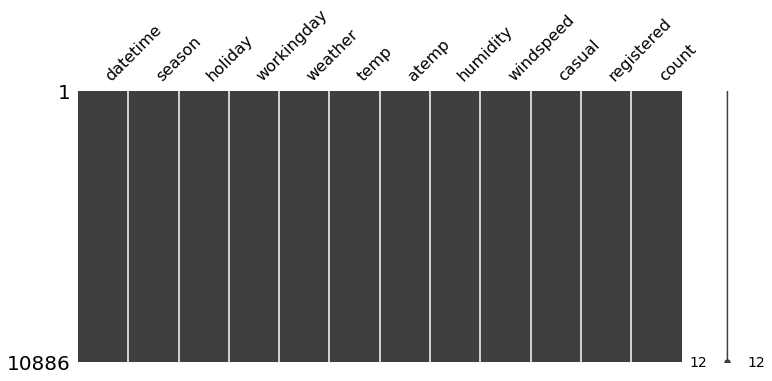

In [7]:
msno.matrix(dfTrain, figsize=(12,5)) #1=72pix

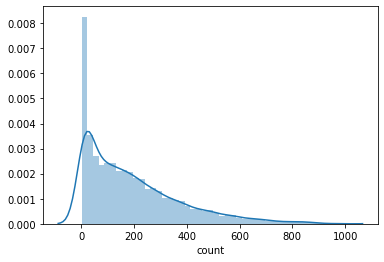

In [8]:
sns.distplot(dfTrain['count'])

In [9]:
# skewness(비대칭도): 분포가 얼마나 비대칭인지를 알려주는 척도
#     0이면 정규분포, <0이면 오른쪽으로 치우침, >0이면 왼쪽으로 치우짐
dfTrain['count'].skew()

1.2420662117180776

In [10]:
#kurtosis(첨도): 확률분포의 뾰족한 정도
#0:표준정규분포
#<0:표준정규분포보다 넓게 퍼져있다(둥글다)
#>0:        "        뾰족하다
dfTrain['count'].kurt()

1.3000929518398334

In [11]:
dfTrain['year']=dfTrain['datetime'].dt.year
dfTrain['month']=dfTrain['datetime'].dt.month
dfTrain['day']=dfTrain['datetime'].dt.day
dfTrain['hour']=dfTrain['datetime'].dt.hour

In [12]:
dfTest['year']=dfTest['datetime'].dt.year
dfTest['month']=dfTest['datetime'].dt.month
dfTest['day']=dfTest['datetime'].dt.day
dfTest['hour']=dfTest['datetime'].dt.hour

In [13]:
#x축-년/월/일/시, y축-count

In [14]:
dfTrain['count']
#퀴즈 2
dfTrain['year']
dfTrain['month']
dfTrain['day']
dfTrain['hour']

#퀴즈 2
#dfTrain을 ['year']별로 그룹화를 한다음, 그룹별 count의 합계와 평균을 출력



0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

In [15]:
dfTrain.groupby(['year'])['count'].sum()
dfTrain.groupby(['year'])[['count']].sum()
dfTrain.groupby(['year'])['count'].mean()
dfTrain.groupby(['year'])[['count']].mean()

,count
year,
2011,144.223349
2012,238.560944


In [16]:
dfTrain.pivot_table(index='year', values='count') #디폴트 : 평균
dfTrain.pivot_table(index='year', values='count', aggfunc='mean')
dfTrain.pivot_table(index='year', values='count', aggfunc='sum')
dfTrain.pivot_table(index='year', values='count', aggfunc=['sum','mean'])

,sum,mean
,count,count
year,,
2011,781979,144.223349
2012,1303497,238.560944


In [17]:
import matplotlib.pyplot as plt

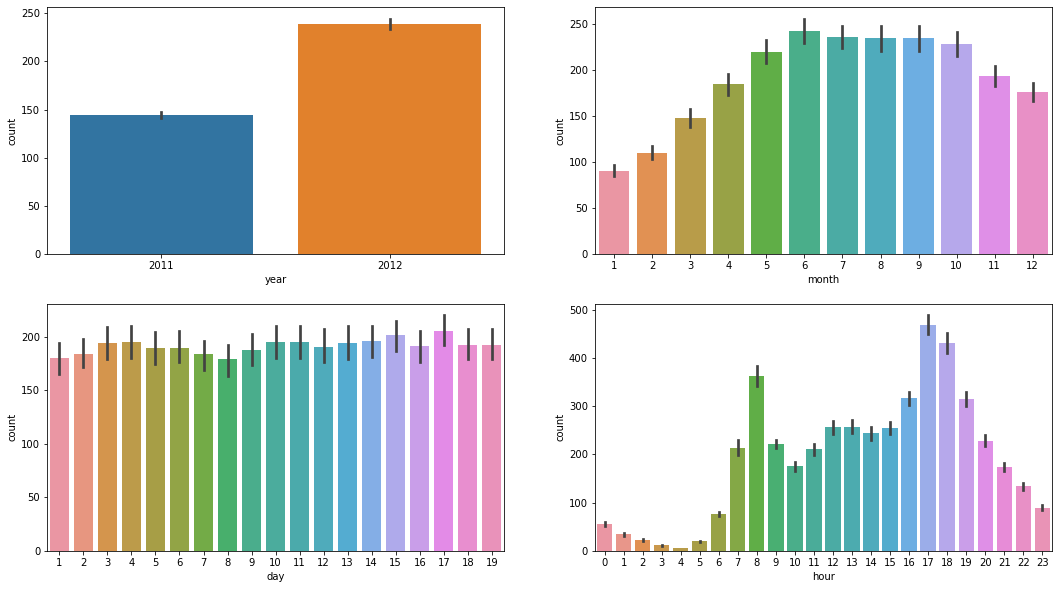

In [18]:
#sns.barplot(data=dfTrain) 
#barplot에서 y축 별도로 설정하지 않으면, 전체 평균값
#barplot에서 y축을 설정하면, 설정된 컬럼의 평균값


fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18,10)

sns.barplot(data=dfTrain, x='year', y='count', ax=axes[0][0]) #연도별 count의 평균
sns.barplot(data=dfTrain, x='month', y='count', ax=axes[0][1])
sns.barplot(data=dfTrain, x='day', y='count', ax=axes[1][0])
sns.barplot(data=dfTrain, x='hour', y='count', ax=axes[1][1])

In [19]:
dfTrain['dayofweek']=dfTrain['datetime'].dt.dayofweek
#0:월요일, 6일:일요일
dfTest['dayofweek']=dfTest['datetime'].dt.dayofweek
dfTrain.shape

(10886, 17)

In [20]:
#퀴즈3.
#각 요일별 데이터 건수를 출력
dfTrain.groupby('dayofweek').size()
#0(월요일) : 1551건 데이터
#...
#6(일요일) : 1579건 데이터

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
dtype: int64

In [21]:
dfTrain.groupby("dayofweek")["datetime"].count()

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: datetime, dtype: int64

In [22]:
dfTrain['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

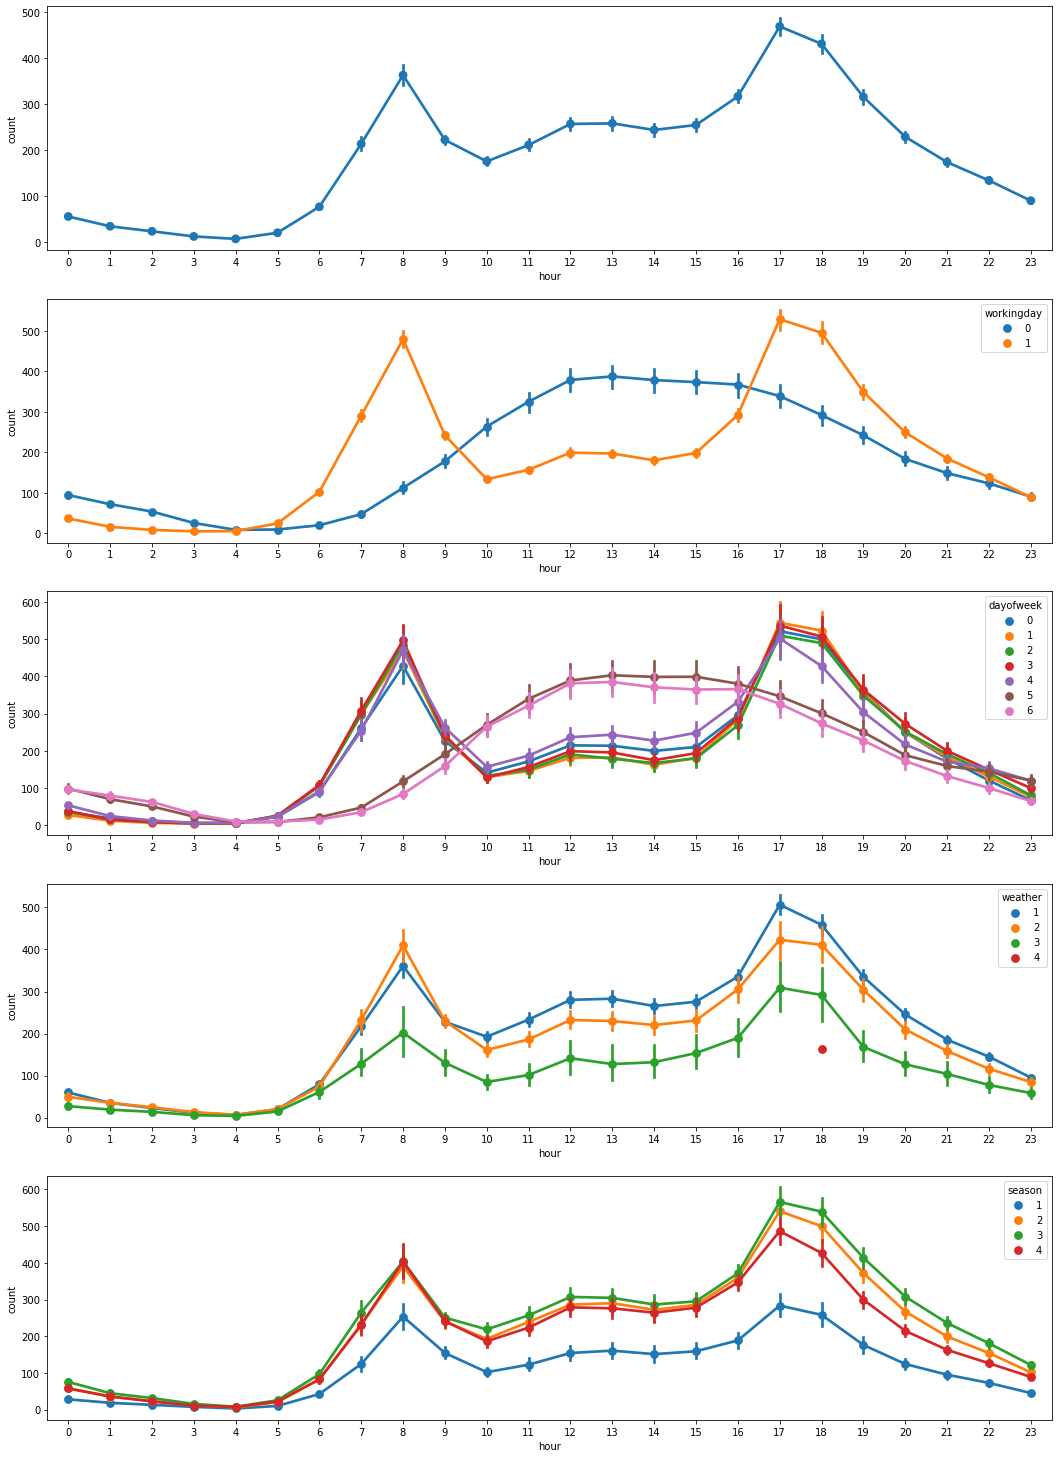

In [23]:
#x축 hour로 고정하고, y축 count -> 시간의 흐름에 따른 대여량 변화가 어떤 패턴이 있는지?

fig, axes=plt.subplots(nrows=5)
fig.set_size_inches(18,26)

sns.pointplot(data=dfTrain, x='hour', y='count', ax=axes[0])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='workingday', ax=axes[1])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='dayofweek', ax=axes[2])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='weather', ax=axes[3])
sns.pointplot(data=dfTrain, x='hour', y='count', hue='season', ax=axes[4])


In [24]:
#상관계수행렬

In [25]:
dfTrain.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [26]:
cData=dfTrain[['temp','atemp', 'humidity', 'windspeed','casual', 'registered','count']]

In [27]:
cData.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


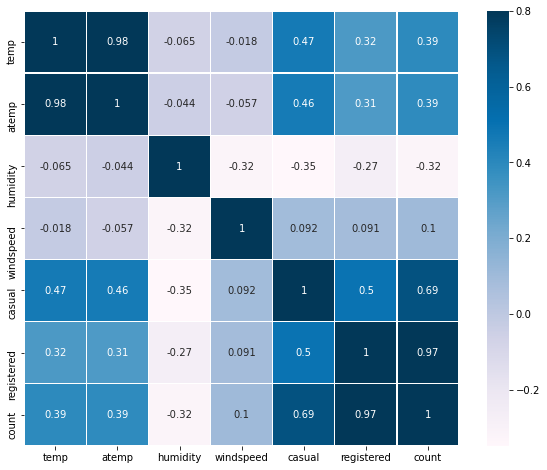

In [28]:
plt.subplots(figsize=(10,8))
sns.heatmap(cData.corr(), linecolor='white', linewidths=0.2, square=True,
            annot=True,cmap=plt.cm.PuBu, vmax=0.8, annot_kws={'size':10})

In [29]:
dfTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


- 다중공선성 : 독립변수들 간에 선형 독립이 아닌 경우
- 예측모델의 일부 독립 변수가 다른 독립변수와 상관관계가 높아서,
- 데이터 분석하는 과정 부정적인 영향을 주게되는 현상

- 독립변수(x), 종속변수(y)
- y=x1+x2+...+5
- ex) 학업 성취도와 음주 사이의 관계 (영향)?? 회귀분석
    
    - 하루음주량과 혈중알콜농도가 독립인가 ? ㄴㄴ아님 매우 높은 상관관계가 있음
    - 그러므로 다중공선성이 존재

- 다중공신성 해결?
    - vif값을 조사-> 10이상이면 다중공선성이 있는 것으로 간주 
    - -> 변수를 제거(변수 선택)/차원축소(pca, 주성분분석)
    - 차원축소()
        - 학업성취도(y), 하루음주량 (x1), 혈중알콜농도(x2)
        - 학업성취도(y), 음주를 즐기는 정도(x)
        


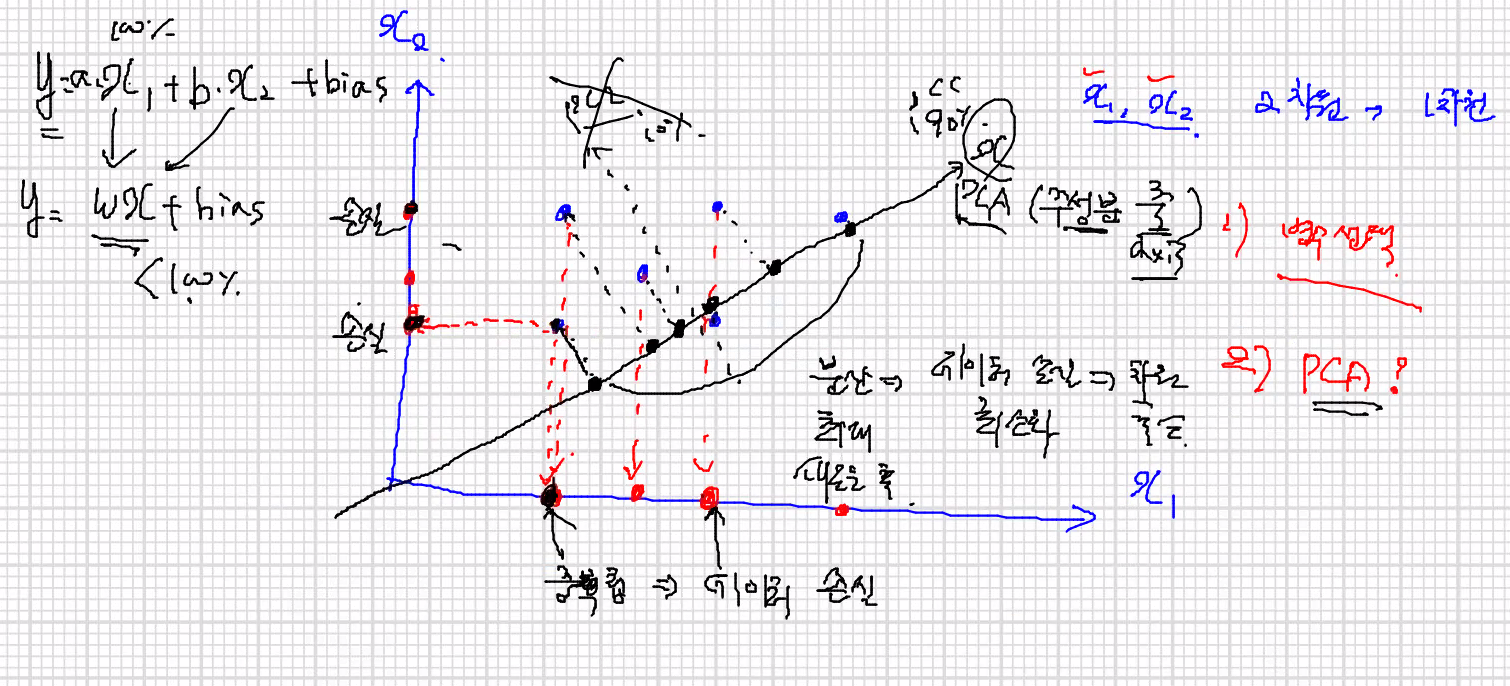

- x축 : temp, windspeed, humidity
- y축 : count
- scatter plot


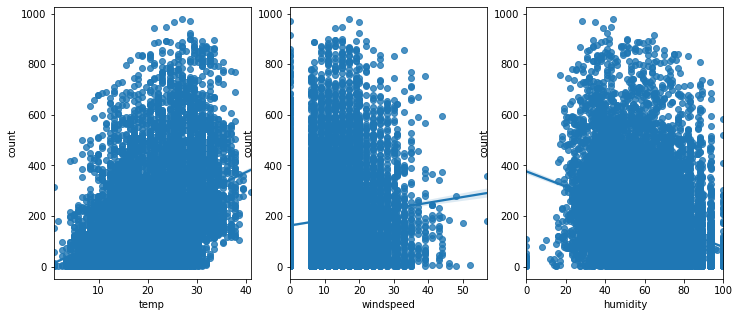

In [30]:
# scatter plot
fig,axes=plt.subplots(ncols=3,figsize=(12,5))

tdata=pd.concat([dfTrain['count'], dfTrain['temp']],axis=1)
sns.regplot(x='temp',y='count',data=tdata, scatter=True, ax=axes[0])

wdata=pd.concat([dfTrain['count'], dfTrain['windspeed']],axis=1)
sns.regplot(x='windspeed',y='count',data=wdata, scatter=True, ax=axes[1])

hdata=pd.concat([dfTrain['count'], dfTrain['humidity']],axis=1)
sns.regplot(x='humidity',y='count',data=hdata, scatter=True, ax=axes[2])

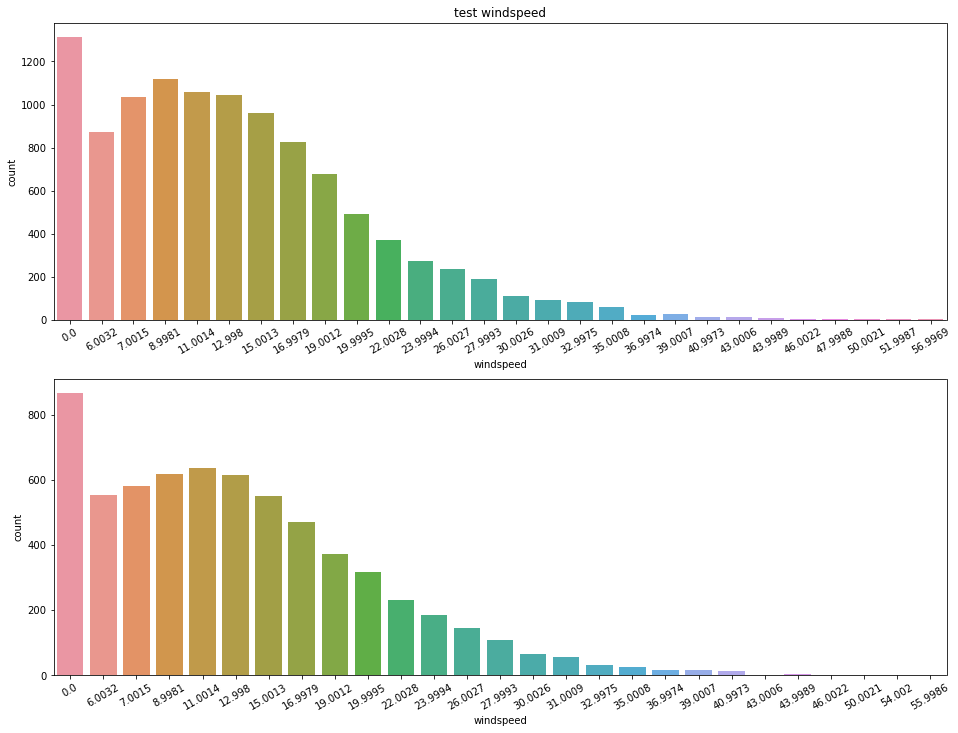

In [31]:
fig,axes = plt.subplots(nrows=2,figsize=(16,12))

plt.sca(axes[0])
plt.xticks(rotation=30) # x축 글자 기울이기
axes[0].set(ylabel='count', title='train windspeed')
sns.countplot(data=dfTrain, x='windspeed',ax=axes[0])
# countplot : 카테고리별로 데이터의 개수를 출력, 데이터프레임에서만 사용가능

plt.sca(axes[1])
plt.xticks(rotation=30) # x축 글자 기울이기
axes[0].set(ylabel='count', title='test windspeed')
sns.countplot(data=dfTest, x='windspeed',ax=axes[1])

x축 : year와  month 기준으로 y출 : count값 출력
- 2011년1월 ~ 2012년 12월 , count

In [32]:
# dfTrain의 datetime에서 연도, 월 추출 => 연도와 월을 결합한 새로운 컬럼 생성

def myconcat(dt):
    return "{0}-{1}".format(dt.year,dt.month)
dfTrain['ym']=dfTrain['datetime'].apply(myconcat)
dfTest['ym']=dfTest['datetime'].apply(myconcat)


In [33]:
dfTrain[['datetime','ym']]

,datetime,ym
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


In [34]:
dfTest[['datetime','ym']]

,datetime,ym
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1
...,...,...
6488,2012-12-31 19:00:00,2012-12
6489,2012-12-31 20:00:00,2012-12
6490,2012-12-31 21:00:00,2012-12
6491,2012-12-31 22:00:00,2012-12


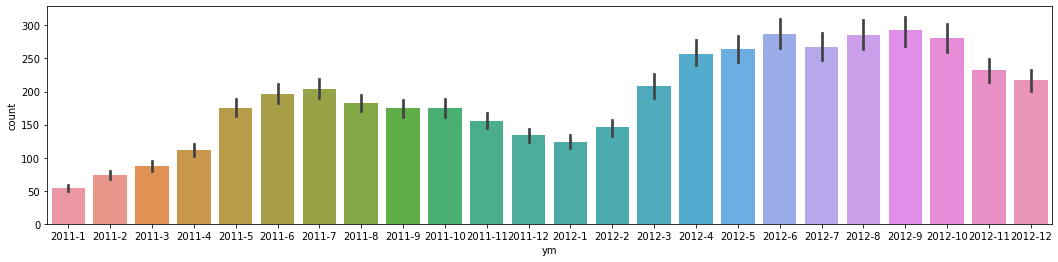

In [35]:
plt.subplots(figsize=(18,4))
sns.barplot(data=dfTrain,y='count',x='ym')

In [36]:
import numpy as np

In [37]:
from collections import Counter
Counter('hello world').most_common()
Counter('hello world').most_common(1)

[('l', 3)]

In [38]:
Counter("hello world")

Counter({'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

In [39]:
Counter("hello world").items()

dict_items([('h', 1), ('e', 1), ('l', 3), ('o', 2), (' ', 1), ('w', 1), ('r', 1), ('d', 1)])

In [40]:
def detectOutliers(df,features):
    outlierIndices=[]
    
    for col in features:
        Q1=np.percentile(df[col],25) # 25% 지점의 값 (q1)
        Q3=np.percentile(df[col],75) # 75% 지점의 값 (q3)
        IQR=Q3-Q1
        outlierStep=IQR*1.5
        
        outlierCol=df[(df[col]<Q1-outlierStep) | (df[col]> Q3+outlierStep)].index
        #print(outlierCol)
        outlierIndices.extend(outlierCol)
    #print(outlierIndices)
    #print(Counter(outlierIndices))   
    oi=Counter(outlierIndices)
    multipleOutliers=[k for k,v in oi.items() if v > 2]
    return multipleOutliers


OutliersToDrop=detectOutliers(dfTrain,["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])
# OutliersToDrop
# 최소3개 이상의 칼럼에서  outlier가 발생한 데이터의 index 번호리스트(제거대상)





In [41]:
dfTrain.loc[6658]

datetime      2012-03-14 17:00:00
season                          1
holiday                         0
workingday                      1
weather                         1
temp                         28.7
atemp                       31.82
humidity                       28
windspeed                  6.0032
casual                        140
registered                    642
count                         782
year                         2012
month                           3
day                            14
hour                           17
dayofweek                       2
ym                         2012-3
Name: 6658, dtype: object

In [42]:
dfTrain.loc[OutliersToDrop]
# 이거를 제거하자

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,ym
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,4,2012-5


In [43]:
dfTrain.drop(OutliersToDrop,axis=0)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,ym
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,2011-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,2012-12


In [44]:
# 해당 내용을 제거했으므로 인덱스가 정렬되지않음
# 인덱스번호 정렬하려면 reset_index(drop=True) 이용
dfTrain=dfTrain.drop(OutliersToDrop,axis=0).reset_index(drop=True)
dfTrain.shape

(10846, 18)

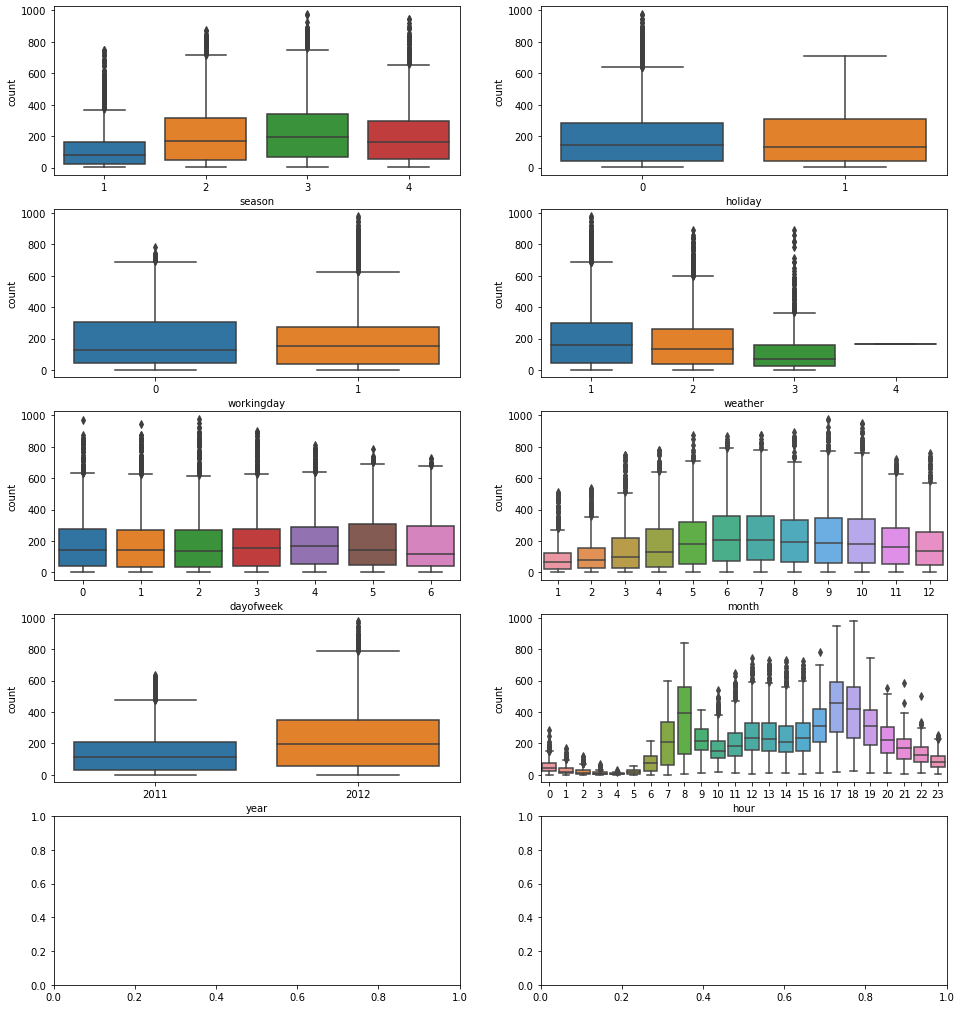

In [45]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))
sns.boxplot(data = dfTrain, y="count", x = "season", orient = "v", ax = axes[0][0]) 
sns.boxplot(data = dfTrain, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = dfTrain, y="count", x = "workingday", orient = "v", ax = axes[1][0]) 
sns.boxplot(data = dfTrain, y="count", x = "weather", orient = "v", ax = axes[1][1]) 
sns.boxplot(data = dfTrain, y="count", x = "dayofweek", orient = "v", ax = axes[2][0]) 
sns.boxplot(data = dfTrain, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = dfTrain, y="count", x = "year", orient = "v", ax = axes[3][0]) 
sns.boxplot(data = dfTrain, y="count", x = "hour", orient = "v", ax = axes[3][1])
